<figure>
<center>
<img src='https://uniandes.edu.co/sites/default/files/logo-uniandes.png' />
</center>
</figure>

<center>

# MIIA - Maestría en Inteligencia Analítica para toma de decisiones

# Métodos Avanzados de Análisis de datos


# P1 - Time Series Analysis
</center>

### Due date: June 22nd at midnight

* The result of your analysis will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
* The project must be carried out in groups of 4 people.
* Use clear and rigorous procedures.
* The delivery of the project is on June 22, 2020, 11:59 pm, through Sicua + (Upload repository link).

Projects will not be received after the delivery time or by any other means than the one established.
The project seeks to analyze a question of interest, which can be framed within a context, in order to interpret the results

1. Choosing your time series (Friday June 12th).

For the project, each group must select a dataset of their choice where the analysis can be performed using a time series model. There are many sources of time series data on the Internet. Government agencies are some of the best sources. But be resourceful. It is better to find a data set is from a process that interests you. Use a recent time-series, also try to avoid a tipical stock-price / exchange rates series. The selected time series must be sent no later than Friday, June 12 11:59 pm, through Sicua +, for approval.

The analysis of the data must consider:

2. Analysis of the context of the problem and relevance of the analysis: This should answer the question of why it is interesting or important to study the selected data.

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the model in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

5. Conclusions: The conclusions must be relevant to the problem of interest. Conclusions on the procedures performed are also expected.

#Integrantes

* Jairo Alberto Pedraza Corredor - Cod. 201924260;
* Javier Alfonso Lesmes Patiño - Cod. 200820243;
* Luis Jorge García Camargo - Cod. 201920053;
* Sergio Alberto Mora Pardo - Cod. 201920547.


#1. Serie seleccionada

La serie seleccionada para la realización del presente proyecto corresponde a la producción mensual de cerveza en Australia en unidades de volumen para el periodo: enero de 1956 - agosto de 1995 (un total de 476 observaciones).

#2. Análisis y relevancia de la serie


**Antecedentes:**

El sector Cervecero en Australia hace parte de la actividad económica del Comercio, el cual aporta aproximadamente un 7% de la actividad económica del país. Dentro del comercio, el Retail lidera el sector con un aporte del 52% donde se ubica el sector Cervecero. 

La Industria Cevecera Australiana inicialmente fue dominada por los productores nacionales tradicionales Carlton & United Breweries (CUB) y León  principalmente. A finales de la década de los 70, empezaron una serie de fusiones de estas empresas regionales con trasnacionales, transformando el mercado a una gran participación extranjera. Actualmente, el mercado lo dominan principalmente: La Cervera CUB que en 2011 se fusionó con la multinacional Sabmiller y hoy en día es 100% propiedad de AB InBev y,  por otra parte, la cervecera León en 2009 pasó a propiedad de la Cervecera Japonesa  Kirin Holdings Company Limited. Estas dos competidores hacen aproximadamente el 89% del mercado. El resto del mercado lo ocupa en mayor medida la Cervecera Nacional Coopers con un 4% de participación.  

**Relevancia e Accionabilidad:** 

El análisis del mercado de Cervezas y específicamente el de la producción es de vital importancia para las industrias cerveceras del País. Es necesario hacer el tracking mensual del mercado y así mismo prever la producción de Cerveza que cubra toda la demanda del mercado. El análisis de esta serie de tiempo de  la producción de Cerveza, le permite a los grandes fabricantes planear, organizar todo el proceso productivo de la manera más óptima posible,  por medio de un anticipo o pronóstico del comportamiento del mercado. Como veremos más adelante en esta serie existen principalmente dos grandes picos de estacionalidad, marcados en primera medida por la temporada navideña y verano (Dic-Ene) y en segunda medida por las vacaciones de mitad de año(Jun-Jul), en donde se observa un incremento muy marcado en la demanda y consumo de Cerveza y por lo tanto tambien en la producción. Por otra parte, les ayuda a entender a los fabricantes cual es el mejor momento o la fecha ideal para realizar lanzamientos de marcas/submarcas en el mercado o para realizar alguna campaña específica en algún sector, de acuerdo a las capacidades de producción que tengan previstas.

**Escalabilidad del Modelo:** 

Actualmente, el mercado al ser dominado principalmente por inversión extranjera, a las multinacionales no les interesa únicamente hacer tracking sobre la producción de Australia, sino también aplicar estos modelos en los demás países  donde tienen participación. La ventaja del sector cervecero es que en muchos países el comportamiento estacional de Diciembre y Junio se mantiene tanto en ventas como en producción, lo que hace que estos modelos y análisis de mercado tengan una fácil escalabilidad en datos de la industria de otros países, además que los modelos y algoritmos aquí utilizados permiten una facil adaptación.





#3. Entendiendo los datos

### 3.1 instalando librerias

In [214]:
!pip uninstall statsmodels

Uninstalling statsmodels-0.11.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/statsmodels-0.11.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.11.1


In [215]:
 !pip install statsmodels --upgraded


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgraded


In [216]:
pip install pyramid-arima

  Using cached https://files.pythonhosted.org/packages/cb/83/540fd83238a18abe6c2d280fa8e489ac5fcefa1f370f0ca1acd16ae1b860/statsmodels-0.11.1-cp36-cp36m-manylinux1_x86_64.whl


In [217]:
!pip install pmdarima # libreria con la función auto_arima()

### 3.2 Importando Librerias

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy import stats
from matplotlib import pyplot
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from fbprophet import Prophet


%matplotlib inline
sns.set()

### 3.3 Importando datos

In [219]:
url = 'https://raw.githubusercontent.com/sergiomora03/AdvancedMethodsDataAnalysis/master/datasets_56102_107707_monthly-beer-production-in-austr.csv'
data = pd.read_csv(url)
data.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [220]:
#Descripción de la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


De acuerdo a lo observado en la data original es necesario transformar la variable **Month** a formato fecha

In [221]:
data.Month = pd.to_datetime(data.Month)
data.set_index('Month', inplace=True)
data.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


### 3.4. Transformación y descompocisión

In [222]:
#Producción en logaritmo
data['Log_Production']=np.log(data['Monthly beer production'])

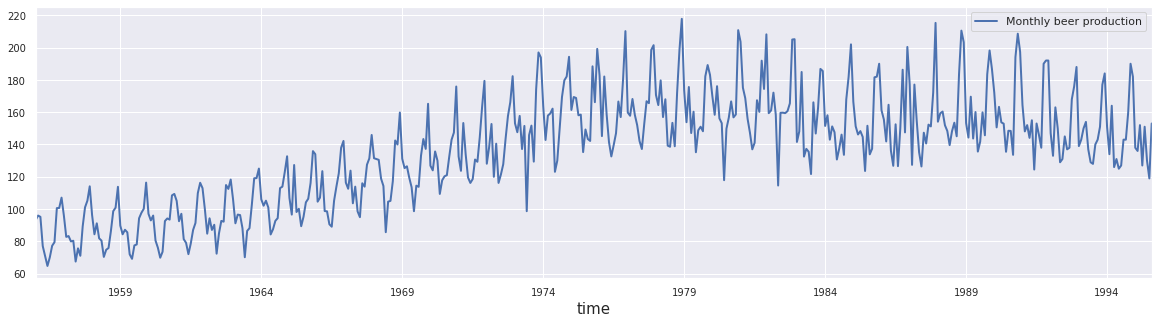

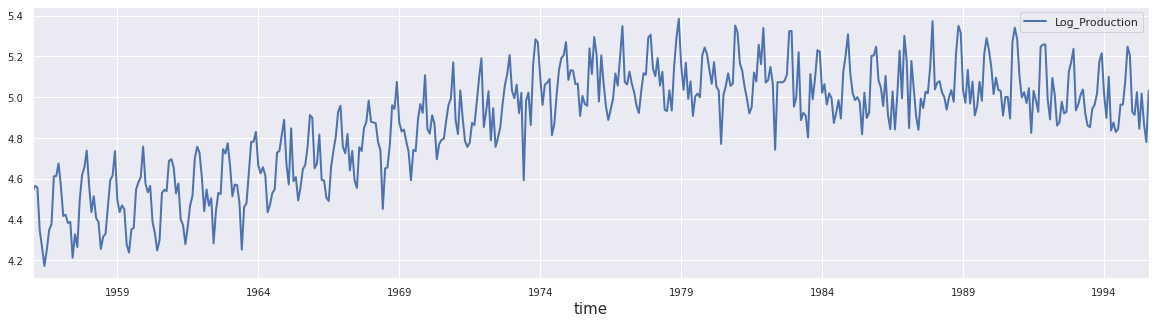

In [223]:
#Evolución de producción de cerveza en Australia durante el periodo de análisis (niveles y logaritmo)
data[['Monthly beer production']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);
data[['Log_Production']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

Los anteriores gráficos permiten observar la evolución de la producción de cerveza en Australia para el periodo de análisis.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



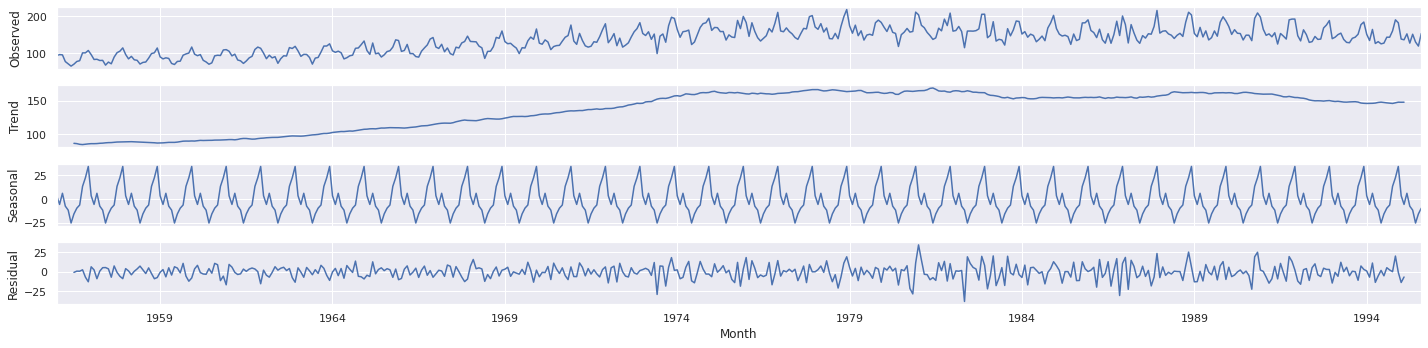

In [224]:
res = seasonal_decompose(data['Monthly beer production'], model='additive',freq=12)

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20,5))

plotseasonal(res, axes)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



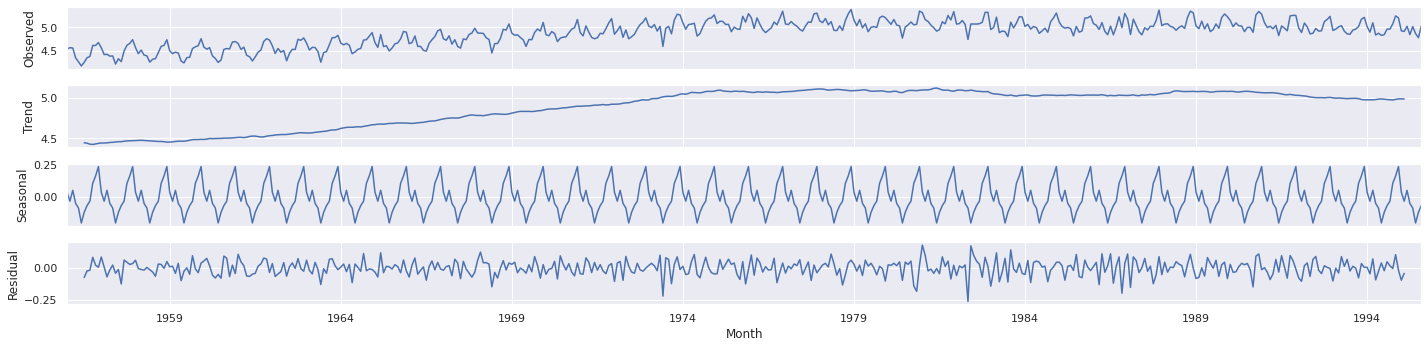

In [225]:
res = seasonal_decompose(data['Log_Production'], model='additive',freq=12)

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20,5))

plotseasonal(res, axes)

plt.tight_layout()
plt.show()

A partir de los gráficos de la producción de cerveza (tanto en niveles como en logaritmo), se puede observar lo siguiente en relación con el comportamiento de la serie y sus componentes:

1) Hasta el año 1974 se registra un crecimiento importante de la producción de cerveza en el país, mostrando un tendencia positiva durante estos primeros años de análisis, para luego estabilizarse y tener una ligera disminución a principios de la decada de los 80´s (tendencia negativa). La presencia de diferentes tendencias en el tiempo, indican inicialmente que la serie no es estacionaria.

2) La serie tiene un marcado componente estacional, que consiste en un aumento de la producción de cerveza cada 12 meses, especificamente a finales del año (noviembre - diciembre) para luego disminuir a partir del mes de enero del siguiente año. Esta dinámica es consistente con la temporada de verano de Australia.

3) El cambio en la amplitud del cada ciclo y la presencia de un componente aleatorio en el periodo de análisis, indican que la producción de cerveza ha recibido diferentes choques (oferta o demanda) que ha cambiado su dinámica en el tiempo y, además, puede indicar problemas de heterocedasticidad en la serie.

### 3.5. Análisis de estacionariedad

In [226]:
beer=data['Monthly beer production']
Log_beer=data['Log_Production']

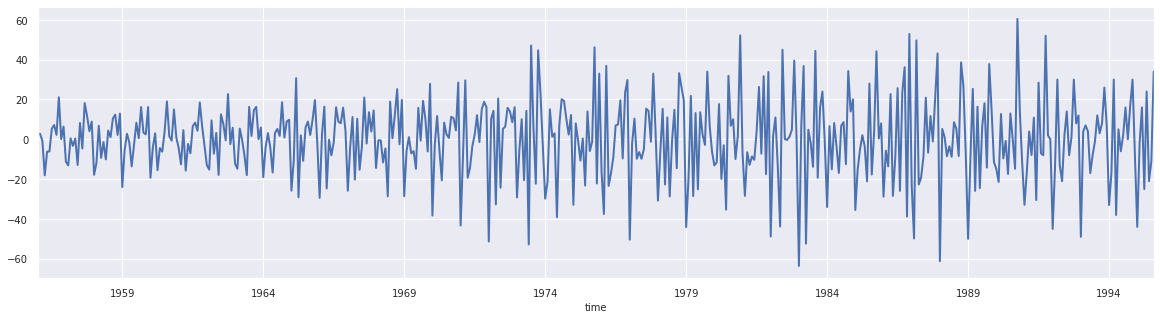

In [227]:
#Primera diferencia de la serie (niveles)
beer.diff().plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=10);

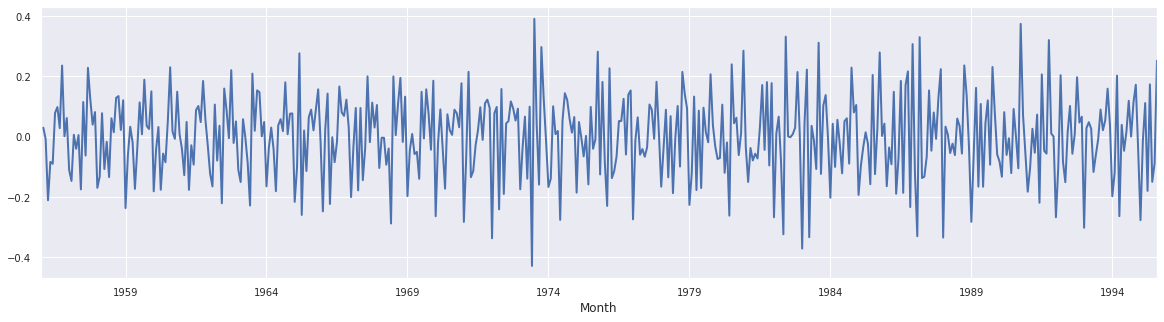

In [228]:
#Primera diferencia de la serie (logaritmo)
Log_beer.diff().plot(figsize=(20,5), linewidth=2, fontsize=10)

Una vez se diferencian las series se observa que la tendencia desaparece. Adicionalmente, con la transformación de logaritmo parece mejorar el problema de varianza no constante. Por consiguiente, el ejercicio de análisis y estimación se realizará con **la serie en logaritmo**.

No obstante, a continuación, se procede a realizar la prueba de Dickey- Fuller para realizar una verificación formal de la estacionariedad de la serie.

In [229]:
#Prueba Dickey- Fuller
result = adfuller(data['Log_Production'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.800769
p-value: 0.058164
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


Los resultados de la prueba de Dickey- Fuller confirman que, con un nivel de significancia del 5%, la serie de producción de cerveza no es estacionaria.

In [230]:
#Prueba Dickey- Fuller - primera diferencia
result = adfuller(data['Log_Production'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.869646
p-value: 0.000040
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


Los resultados de la prueba de Dickey- Fuller confirman que, con un nivel de significancia del 5%, la serie de producción de cerveza diferenciada si es estacionaria.

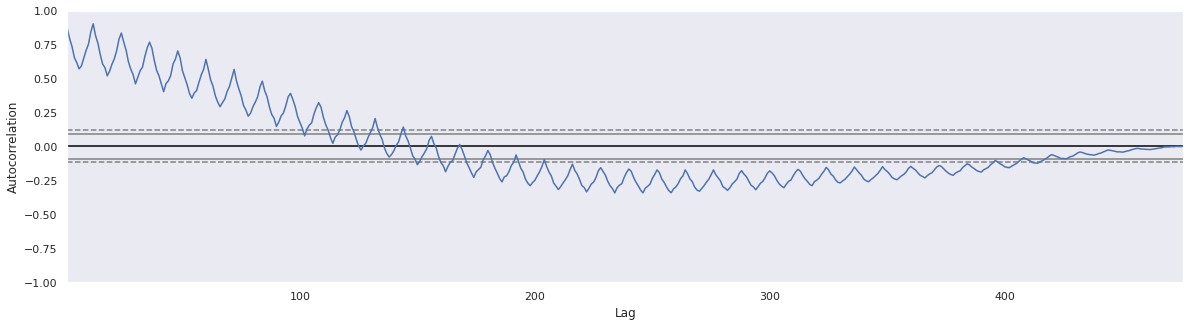

In [231]:
#Autocorrelación de la serie en análisis
plt.figure(figsize=(20,5))
pd.plotting.autocorrelation_plot(data['Log_Production']);

Como se comprobó en el test de raíz unitaria, esta caída lenta en la función de autocorrelación simple, da indicios que la serie es no estacionaria.

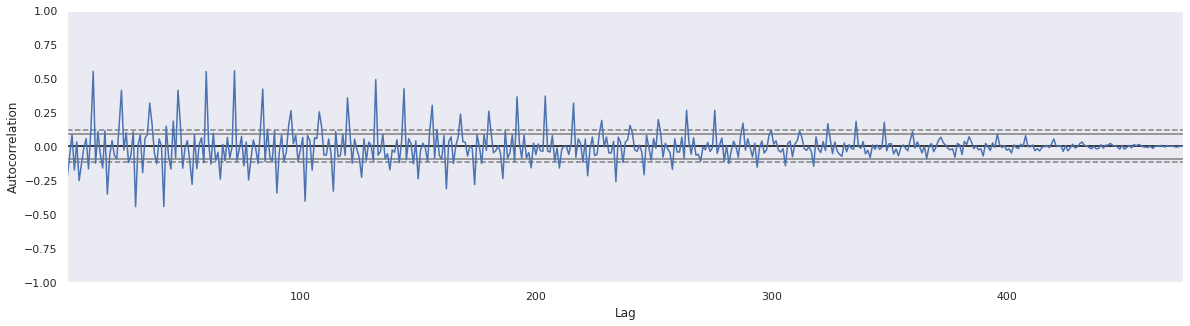

In [232]:
#Autocorrelación de la primera diferencia de la serie en análisis
plt.figure(figsize=(20,5))
pd.plotting.autocorrelation_plot(data['Log_Production'].diff().iloc[1:]);

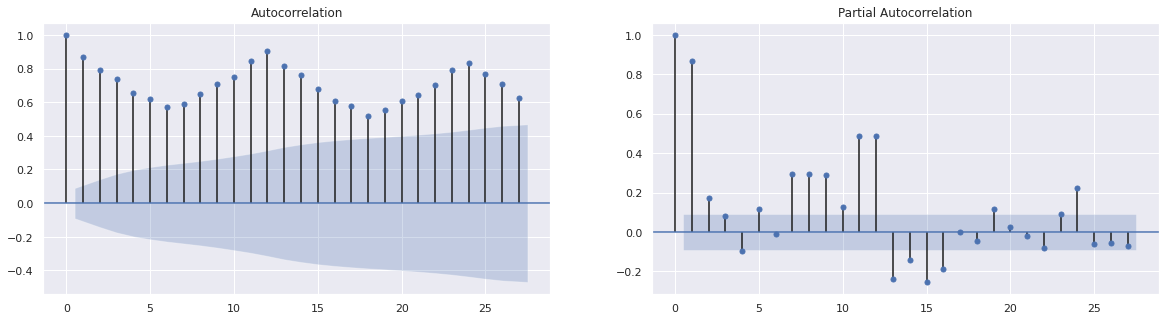

In [233]:
#Autocorrelación simple y parcial serie producción cerveza
fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_acf(data['Log_Production'], ax=ax[0])
plot_pacf(data['Log_Production'], ax=ax[1])
plt.show()

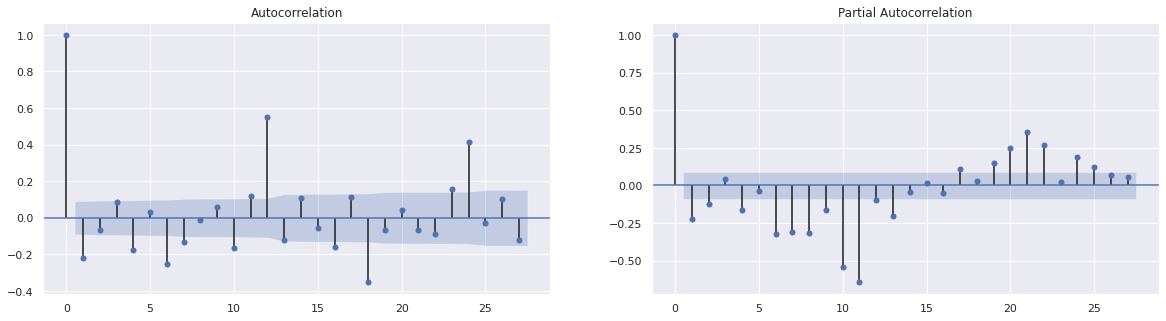

In [234]:
#Autocorrelación simple y parcial primera diferencia de serie producción cerveza
fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_acf(data['Log_Production'].diff().iloc[1:], ax=ax[0])
plot_pacf(data['Log_Production'].diff().iloc[1:], ax=ax[1])
plt.show()

#4. Aplicación de modelos de predicción

En la presente sección se procede a la estimación de diferentes modelos de predicción: ARIMA, SARIMA, Prophet y una red reuronal recurente con una celda LSTM.

## 4.1. Modelo ARIMA

#### 4.1.1 Selección proceso ARIMA a estimar

In [235]:
X = data['Log_Production'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]


def ARIMA_FUNCTION(p,q):
	for t in range(len(test)):
		model_1 = ARIMA(history, order=(p,1,q))
		model_fit_1 = model_1.fit(disp=0)
		output = model_fit_1.forecast()
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
	return mean_squared_error(test, predictions)**0.5

In [236]:
results=[]
for i in range(3):
    for j in range(4):
        if (i>j or i==0) and (i-j<3) :
            predictions = list()
            history = [x for x in train]
            results.append([i,j,ARIMA_FUNCTION(i,j)])
            print((i,j))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(2, 0)
(2, 1)


Escenarios para evaluar los procesos *ARIMA*, en estos casos en todos los modelos utilizamos 1 Diferenciación, el primer parámetro representa el proceso AR, el segundo corresponde al MA

In [237]:
results

[[0, 0, 0.13993939835685287],
 [0, 1, 0.13641568985018593],
 [0, 2, 0.12223215723210823],
 [0, 3, 0.12553301426466412],
 [1, 0, 0.1386813990224017],
 [2, 0, 0.13503124387832144],
 [2, 1, 0.12450787653625967]]

De acuerdo a los RMSE obtenidos para cada modelo evaluado en los procesos ARIMA, el mejor modelo es el ARIMA (0,1,2) con un RMSE correspondiente a 0.12223215571124342

#### 4.1.2 Estimación modelo

In [238]:
model = ARIMA(train, order=(0,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  427
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 285.100
Method:                       css-mle   S.D. of innovations              0.124
Date:                Mon, 22 Jun 2020   AIC                           -562.200
Time:                        20:39:28   BIC                           -545.972
Sample:                             1   HQIC                          -555.790
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.001      2.964      0.003       0.001       0.003
ma.L1.D.y     -0.4803      0.043    -11.209      0.000      -0.564      -0.396
ma.L2.D.y     -0.4373      0.042    -10.513      0.0

#### 4.1.3. Análisis de residuales

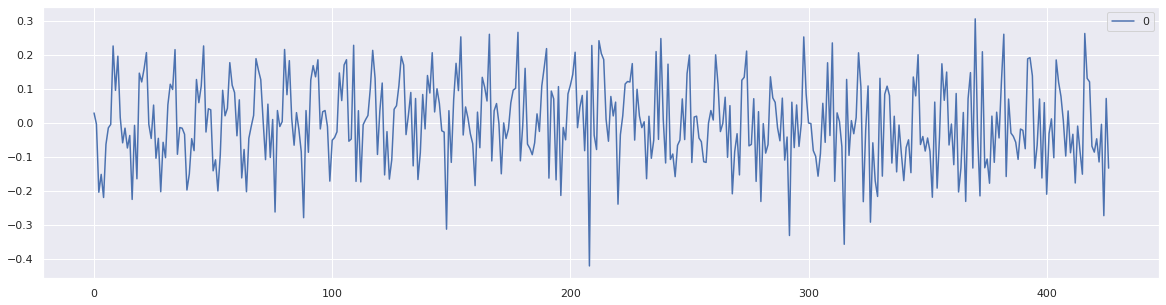

In [239]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,5))
plt.show()

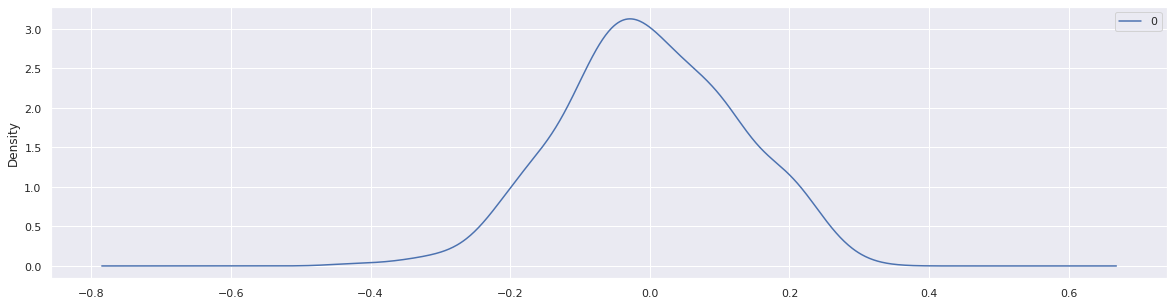

                0
count  427.000000
mean    -0.000755
std      0.124216
min     -0.421687
25%     -0.084194
50%     -0.005172
75%      0.086145
max      0.304919


In [240]:
residuals.plot(kind='kde', figsize=(20,5))
plt.show()
print(residuals.describe())

De acuerdo a los gráficos de los residuales podemos observar que el proceso tiene media constante, centrada alrededor de cero y varianza constante. Tambien, graficamente parece ajustarse a una distribución Normal, sin embargo validamos esto con una prueba de normalidad 

In [241]:
print("KS P-value = "+str(round(stats.kstest(residuals, 'norm')[1], 10)))

KS P-value = 0.0


Según los resultados del test de Kolmogorov Smirnoff con un nivel de significancia del 5% no podemos concluir que los residuales se ajustan a una distribución normal.

#### 4.1.4. Rolling Forecast

In [242]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model_1 = ARIMA(history, order=(0,1,2))
    model_fit_1 = model_1.fit(disp=0)
    output = model_fit_1.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=5.018557, expected=4.927254
predicted=5.030858, expected=5.247024
predicted=5.186171, expected=5.257495
predicted=5.130449, expected=5.257495
predicted=5.167606, expected=4.990433
predicted=5.020617, expected=4.890349
predicted=5.031399, expected=5.093750
predicted=5.123004, expected=5.010635
predicted=5.037868, expected=4.859812
predicted=4.994596, expected=4.875197
predicted=5.011087, expected=4.976734
predicted=5.047002, expected=4.919981
predicted=4.995663, expected=4.927254
predicted=5.016496, expected=5.123964
predicted=5.105837, expected=5.170484
predicted=5.094372, expected=5.236442
predicted=5.143182, expected=4.934474
predicted=4.970753, expected=4.962845
predicted=5.060067, expected=5.010635
predicted=5.038711, expected=5.036953
predicted=5.060950, expected=4.919981
predicted=4.988263, expected=4.859812
predicted=4.983117, expected=4.852030
predicted=4.970619, expected=4.941642
predicted=5.014097, expected=4.962845
predicted=5.000570, expected=5.017280
predicted=5.

In [243]:
error_ARIMA = mean_squared_error(test, predictions)**0.5
print('Test RMSE: %.3f' % error_ARIMA)

Test RMSE: 0.122


Después de ejecutar el procedimiento de Rolling Forecast con el test el RMSE obtenido es de 0.122 con el ARIMA(0,1,2).

In [244]:
RollBack=pd.concat([pd.DataFrame({'TEST':test}),pd.DataFrame({'ARIMA':np.concatenate(predictions, axis=0)})],axis=1)
RollBack.head()

,TEST,ARIMA
0,4.927254,5.018557
1,5.247024,5.030858
2,5.257495,5.186171
3,5.257495,5.130449
4,4.990433,5.167606


#### 4.1.5. Comparación preliminar estimaciones



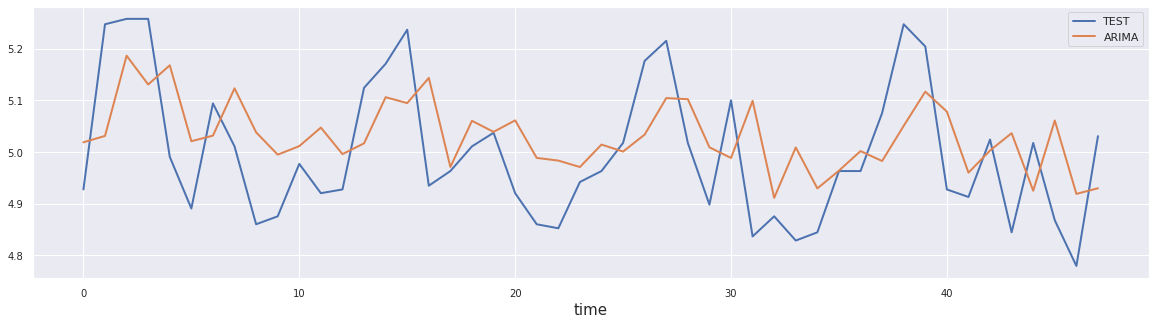

In [245]:
RollBack.plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

## 4.2. Modelo SARIMA

Según el análisis de la serie existe un fuerte componente estacional en la producción de cerveza que, como se observó anteriormente, no está siendo capturado por el proceso ARIMA seleccionado. Por consiguiente, se procede a estimar un modelo SARIMA, que es un modelo ARIMA que incluye el componente estacional de las series.

#### 4.2.1. Selección proceso SARIMA a estimar

In [246]:
stepwise_model = auto_arima(train, 
                            start_p=0,
                            start_q=0, 
                            max_p=5, 
                            max_d=2, 
                            max_q=5, 
                            start_P=1,
                            start_Q=1, 
                            max_P=2, 
                            max_D=2, 
                            max_Q=2, 
                            max_order=10,
                            m=12,
                            seasonal=True,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=-726.260, BIC=-710.033, Time=1.785 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=-490.740, BIC=-482.627, Time=0.073 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=-730.501, BIC=-714.274, Time=1.059 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=-654.380, BIC=-638.153, Time=0.950 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=-492.714, BIC=-488.658, Time=0.033 seconds
Fit ARIMA(1,1,0)x(0,0,0,12) [intercept=True]; AIC=-512.047, BIC=-499.877, Time=0.124 seconds
Fit ARIMA(1,1,0)x(2,0,0,12) [intercept=True]; AIC=-750.258, BIC=-729.974, Time=4.175 seconds
Fit ARIMA(1,1,0)x(2,0,1,12) [intercept=True]; AIC=-848.839, BIC=-824.498, Time=7.186 seconds
Near non-invertible roots for order (1, 1, 0)(2, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA(1,1,0)x(1,0,1,12) [intercept=True]; AIC=-84

Una vez evaluadas las posibles combinaciones para el proceso SARIMA, el modelo con el mejor performance es el que tiene menor AIC, en este caso es el ARIMA(1,1,1)x(2,0,2,12) con un AIC=-1014.517

#### 4.2.2. Estimación modelo

In [247]:
mod = sm.tsa.statespace.sarimax.SARIMAX(train, trend='n', order=(1,1,1), seasonal_order=(2,0,2,12))
results = mod.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  428
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                 516.498
Date:                                 Mon, 22 Jun 2020   AIC                          -1018.997
Time:                                         20:42:09   BIC                           -990.599
Sample:                                              0   HQIC                         -1007.780
                                                 - 428                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1547      0.044     -3.489      0.000      -0.242      -0.068
ma.L1         -0.8857      0.024    -36.844      0.000      -0.933      -0.839
ar.S.L12       0.1037      0.132      0.788      0.431      -0.154       0.362
ar.S.L24       0.8908      0.131      6.795      0.000       0.634       1.148
ma.S.L12       0.0884      0.123      0.718      0.473      -0.153       0.330
ma.S.L24      -0.7997      0.098     -8.136      0.000      -0.992      -0.607
sigma2         0.0048      0.000     17.007      0.000       0.004       0.005
===================================================================================
Ljung-Box (Q):                      297.76   Jarque-Bera (JB):                28.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Evaluando el modelo con los parámetros óptimos, se observa que todos los coeficientes del modelo son significativos a excepción de los primeros coeficientes de AR y MA de la parte estacional, sin embargo los mantenemos en el modelo ya que los segundos coeficientes de AR y MA del componente estacional si son significativos.

#### 4.2.3. Análisis de residuales

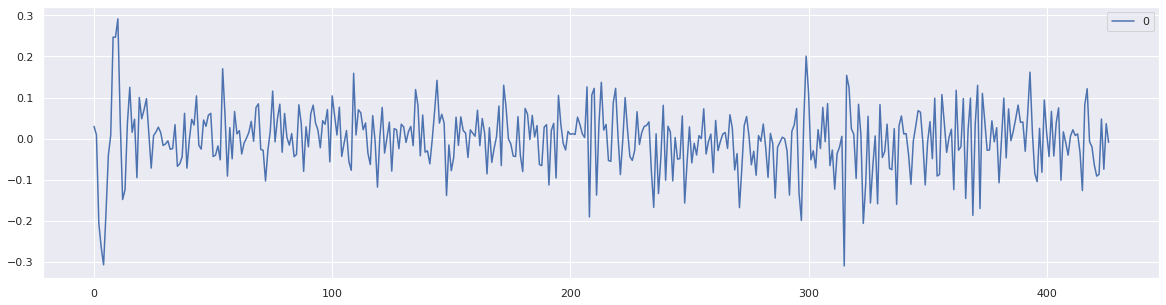

In [248]:
#results.resid
residuals1 = pd.DataFrame(results.resid[1:])
residuals1.plot(figsize=(20,5))
plt.show()

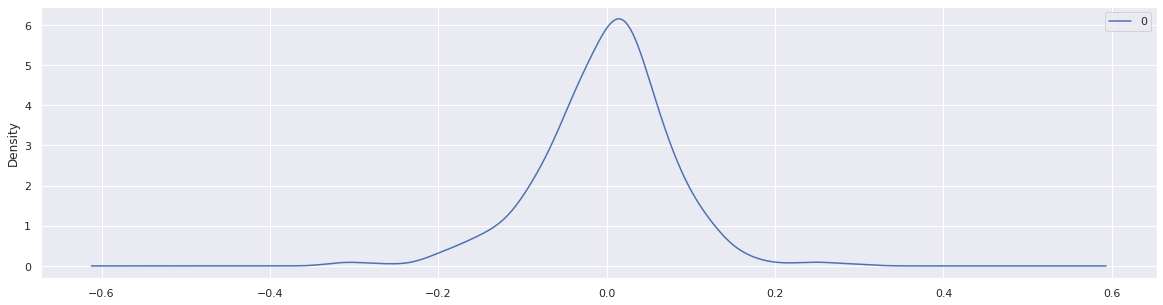

                0
count  427.000000
mean    -0.001334
std      0.076245
min     -0.310785
25%     -0.042455
50%      0.006945
75%      0.040750
max      0.291799


In [249]:
residuals1.plot(kind='kde', figsize=(20,5))
plt.show()
print(residuals1.describe())

In [250]:
print("KS P-value = "+str(round(stats.kstest(residuals1, 'norm')[1], 10)))
print("D’Agostino and Pearson’s P-value = "+str(round(stats.normaltest(residuals1, axis=0)[1][0], 6)))

KS P-value = 0.0
D’Agostino and Pearson’s P-value = 0.0


Según los resultados del test de Kolmogorov Smirnoff con un nivel de significancia del 5% no podemos concluir que los residuales se ajustan a una distribución normal.

#### 4.2.4. Rolling Forecast

In [251]:
X = data['Log_Production'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = sm.tsa.statespace.sarimax.SARIMAX(history, trend='n', order=(1,1,1), seasonal_order=(2,0,2,12))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dis

In [252]:
error_SARIMA = mean_squared_error(test, predictions)**0.5
print('Test RMSE: %.3f' % error_SARIMA)

Test RMSE: 0.063


El mejor modelo SARIMA de los testeados presenta un RMSE sobre los datos de test de 0.062.

In [253]:
RollBack=pd.concat([RollBack,pd.DataFrame({'SARIMA':predictions})],axis=1)
RollBack.head()

,TEST,ARIMA,SARIMA
0,4.927254,5.018557,4.994423
1,5.247024,5.030858,5.182985
2,5.257495,5.186171,5.227022
3,5.257495,5.130449,5.303290
4,4.990433,5.167606,5.107199


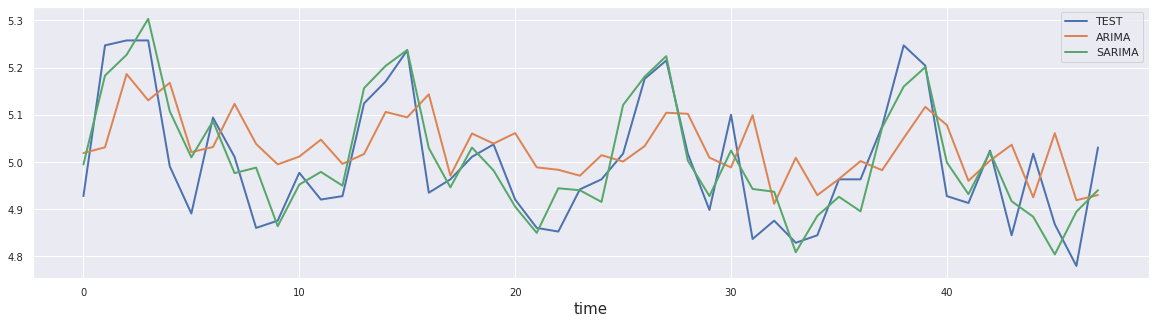

In [254]:
RollBack.plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

## 4.3. Prophet Forecast

#### 4.3.1. Estimación modelo

In [255]:
data_pf = pd.DataFrame({'ds': data.Log_Production.index[:], 'y': data.Log_Production})
data_pf.head()

,ds,y
Month,,
1956-01-01,1956-01-01,4.534748
1956-02-01,1956-02-01,4.564348
1956-03-01,1956-03-01,4.555980
1956-04-01,1956-04-01,4.345103
1956-05-01,1956-05-01,4.261270


In [256]:
X = data_pf.y
Y = data_pf.ds
size = int(len(X) * 0.9)
train_X, test_X = X[0:size], X[size:len(X)]
train_Y, test_Y = Y[0:size], Y[size:len(Y)]
    
Train = pd.concat([train_Y,train_X], axis=1)
Test = pd.concat([test_Y,test_X], axis=1)

In [257]:
predictions = list()
    
def rolling_forecast():   
    history = Train.copy()
    
    for t in range(len(test_X)):
        m = Prophet()
        m.fit(history);
        future = m.make_future_dataframe(periods=1, freq='MS')
        forecast = m.predict(future)
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        yhat = output[['yhat']][len(history):].values[0][0]
        predictions.append(yhat)
        obs = pd.DataFrame(Test[['ds','y']].iloc[t])
        history = pd.concat([history, obs.transpose()],axis=0)
        print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))

    
    error_PROPHET = mean_squared_error(test_X, predictions)**0.5
    print('Test RMSE: %.3f' % error_PROPHET)

In [258]:
rolling_forecast()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.035216, expected=4.927254


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.182063, expected=5.247024


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.222644, expected=5.257495


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.307011, expected=5.257495


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.110226, expected=4.990433


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.062013, expected=4.890349


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.113888, expected=5.093750


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.013037, expected=5.010635


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.983503, expected=4.859812


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.845393, expected=4.875197


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.943328, expected=4.976734


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.997507, expected=4.919981


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.039491, expected=4.927254


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.149055, expected=5.123964


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.211142, expected=5.170484


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.284621, expected=5.236442


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.106879, expected=4.934474


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.012698, expected=4.962845


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.094930, expected=5.010635


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.989352, expected=5.036953


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.953060, expected=4.919981


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.833051, expected=4.859812


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.924432, expected=4.852030


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.970019, expected=4.941642


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.005713, expected=4.962845


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.136867, expected=5.017280


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.187521, expected=5.176150


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.263212, expected=5.214936


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.071420, expected=5.017280


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.998415, expected=4.897840


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.074016, expected=5.099866


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.974081, expected=4.836282


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.932877, expected=4.875197


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.817999, expected=4.828314


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.899115, expected=4.844187


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.946540, expected=4.962845


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.978634, expected=4.962845


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.122595, expected=5.075174


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.168643, expected=5.247024


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.246695, expected=5.204007


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.049629, expected=4.927254


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.984562, expected=4.912655


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=5.058389, expected=5.023881


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.947898, expected=4.844187


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.910696, expected=5.017280


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.805615, expected=4.867534


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=4.877082, expected=4.779123
predicted=4.926444, expected=5.030438
Test RMSE: 0.078


In [283]:
error_PROPHET = mean_squared_error(test_X, predictions) * *0.5
print('Test RMSE: %.3f' % error_PROPHET)

Test RMSE: 0.078


Para el proceso del Rolling Forecast con Prophet separamos la base en train (90% de obs) para estimar el modelo y en test (10%) para calcular el error de la predicción. Dicho esto, escogemos el modelo con menor RMSE el cual es el que predice mejor, en este caso con un RMSE=0.078

In [259]:
RollBack=pd.concat([RollBack,pd.DataFrame({'Prophet':predictions})],axis=1)
RollBack.head()

,TEST,ARIMA,SARIMA,Prophet
0,4.927254,5.018557,4.994423,5.035216
1,5.247024,5.030858,5.182985,5.182063
2,5.257495,5.186171,5.227022,5.222644
3,5.257495,5.130449,5.303290,5.307011
4,4.990433,5.167606,5.107199,5.110226


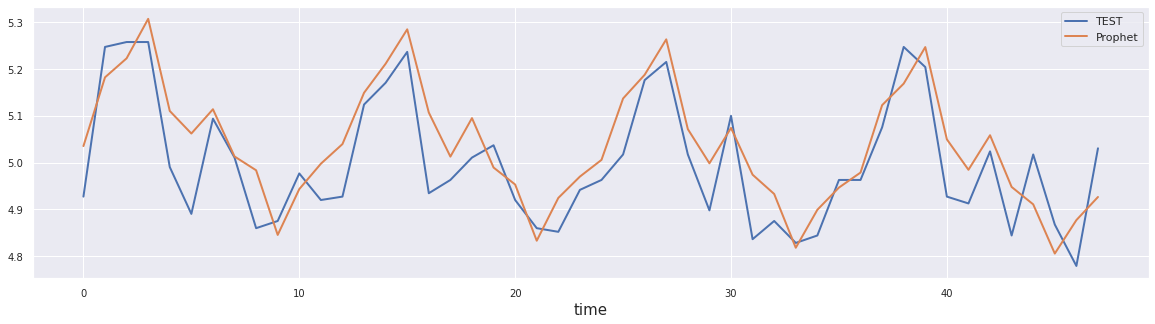

In [260]:
RollBack[['TEST', 'Prophet']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

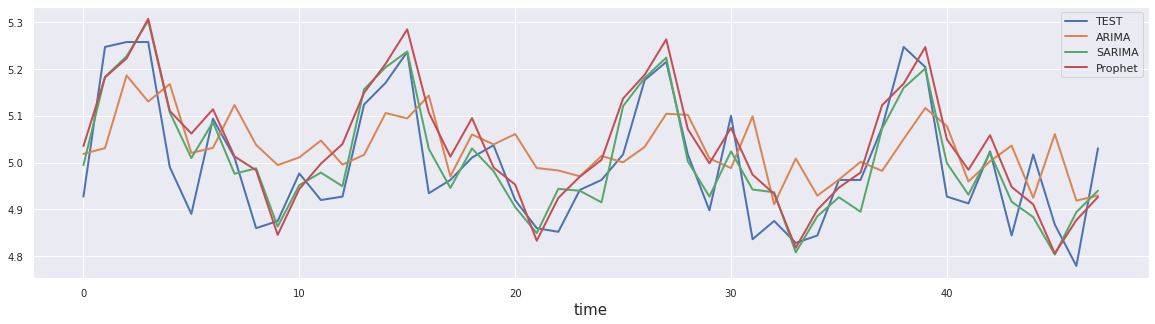

In [261]:
RollBack.plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

## 4.4. LSTM Forecast

In [262]:
data_LSTM = pd.DataFrame({'Log_Production': data.Log_Production})
data_LSTM.head()

,Log_Production
Month,
1956-01-01,4.534748
1956-02-01,4.564348
1956-03-01,4.555980
1956-04-01,4.345103
1956-05-01,4.261270


In [263]:
Y = data_LSTM
size = int(len(Y) * 0.9)

train_Y, test_Y = Y[0:size], Y[size:len(Y)]

In [264]:
scaler = MinMaxScaler()
scaler.fit(train_Y)
scaled_train_data = scaler.transform(train_Y)
scaled_test_data = scaler.transform(test_Y)

In [265]:
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [266]:
lstm_model = Sequential()
lstm_model.add(LSTM(200, input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [267]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
416/416 [==============================] - 4s 10ms/step - loss: 0.0200
Epoch 2/20
416/416 [==============================] - 4s 10ms/step - loss: 0.0132
Epoch 3/20
416/416 [==============================] - 4s 10ms/step - loss: 0.0106
Epoch 4/20
416/416 [==============================] - 4s 10ms/step - loss: 0.0085
Epoch 5/20
416/416 [==============================] - 4s 10ms/step - loss: 0.0081
Epoch 6/20
416/416 [==============================] - 4s 10ms/step - loss: 0.0078
Epoch 7/20
416/416 [==============================] - 4s 10ms/step - loss: 0.0077
Epoch 8/20
416/416 [==============================] - 4s 10ms/step - loss: 0.0079
Epoch 9/20
416/416 [==============================] - 4s 10ms/step - loss: 0.0072
Epoch 10/20
416/416 [==============================] - 4s 10ms/step - loss: 0.0068
Epoch 11/20
416/416 [==============================] - 5s 11ms/step - loss: 0.0066
Epoch 12/20
416/416 [==============================] - 4s 11ms/step - loss: 0.0067
Epoch 13/20
4

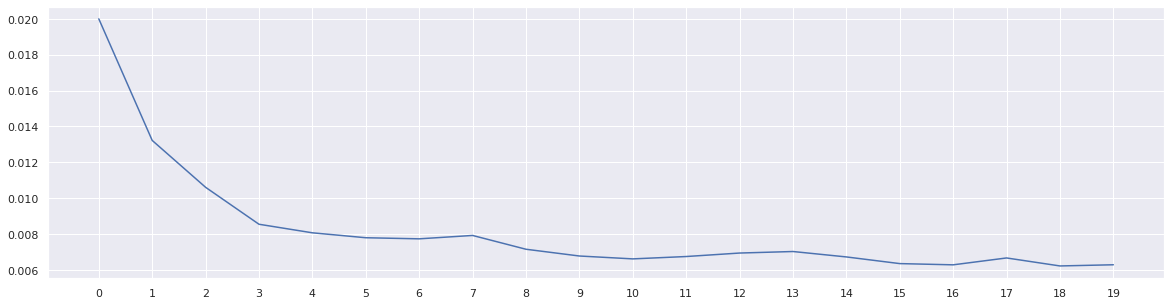

In [268]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [269]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [270]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [271]:
error_LSTM = mean_squared_error(test, lstm_predictions) ** 0.5
print('Test RMSE: %.3f' % error_LSTM)

Test RMSE: 0.146


In [272]:
RollBack = pd.concat([RollBack,pd.DataFrame({'LSTM':np.concatenate(lstm_predictions, axis=0)})],axis=1)
RollBack.head()

,TEST,ARIMA,SARIMA,Prophet,LSTM
0,4.927254,5.018557,4.994423,5.035216,5.106123
1,5.247024,5.030858,5.182985,5.182063,5.252216
2,5.257495,5.186171,5.227022,5.222644,5.274819
3,5.257495,5.130449,5.303290,5.307011,5.230395
4,4.990433,5.167606,5.107199,5.110226,5.151804


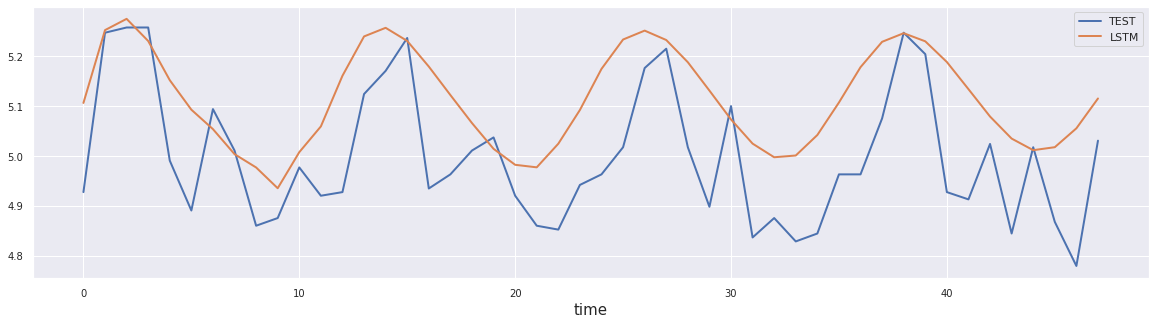

In [273]:
RollBack[['TEST', 'LSTM']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

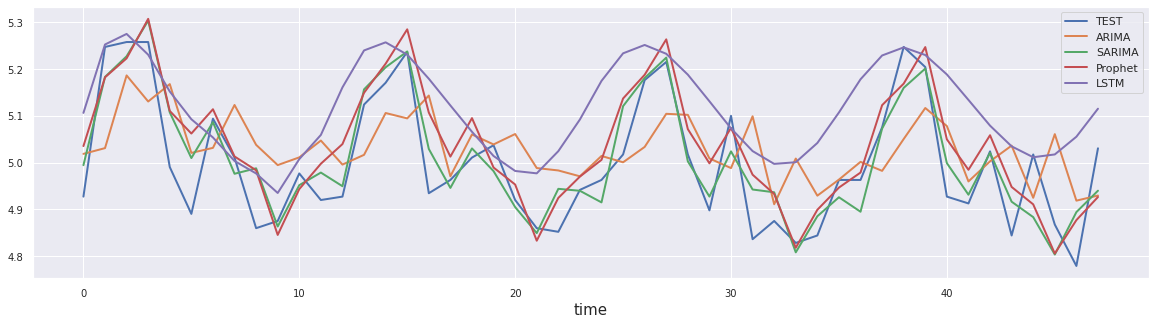

In [274]:
RollBack.plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

#5. Conclusiones

In [275]:
RollBack = pd.concat([RollBack,pd.DataFrame({'Time':data.Log_Production.index[size:]})],axis=1)
RollBack.head()

,TEST,ARIMA,SARIMA,Prophet,LSTM,Time
0,4.927254,5.018557,4.994423,5.035216,5.106123,1991-09-01
1,5.247024,5.030858,5.182985,5.182063,5.252216,1991-10-01
2,5.257495,5.186171,5.227022,5.222644,5.274819,1991-11-01
3,5.257495,5.130449,5.303290,5.307011,5.230395,1991-12-01
4,4.990433,5.167606,5.107199,5.110226,5.151804,1992-01-01


In [276]:
RollBack.set_index('Time', inplace=True)
RollBack.head()

,TEST,ARIMA,SARIMA,Prophet,LSTM
Time,,,,,
1991-09-01,4.927254,5.018557,4.994423,5.035216,5.106123
1991-10-01,5.247024,5.030858,5.182985,5.182063,5.252216
1991-11-01,5.257495,5.186171,5.227022,5.222644,5.274819
1991-12-01,5.257495,5.130449,5.303290,5.307011,5.230395
1992-01-01,4.990433,5.167606,5.107199,5.110226,5.151804


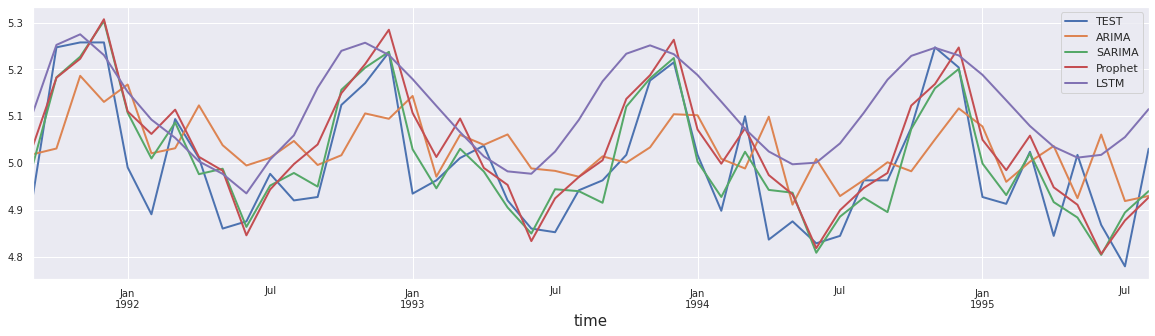

In [277]:
RollBack.plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

In [295]:
Error = pd.DataFrame({"Models":["ARIMA", "SARIMA", "Prophet", "LSTM"],
                      "RMSE Log" : [error_ARIMA, error_SARIMA, error_PROPHET, error_LSTM]})
Error

,Models,RMSE Log
0,ARIMA,0.122232
1,SARIMA,0.062950
2,Prophet,0.077715
3,LSTM,0.146284


In [296]:
print('Test RMSE ARIMA: %.3f' % mean_squared_error(np.exp(RollBack.TEST), np.exp(RollBack.ARIMA)))
print('Test RMSE SARIMA: %.3f' % mean_squared_error(np.exp(RollBack.TEST), np.exp(RollBack.SARIMA)))
print('Test RMSE Prophet: %.3f' % mean_squared_error(np.exp(RollBack.TEST), np.exp(RollBack.Prophet)))
print('Test RMSE LSTM: %.3f' % mean_squared_error(np.exp(RollBack.TEST), np.exp(RollBack.LSTM)))

Test RMSE ARIMA: 347.425
Test RMSE SARIMA: 84.416
Test RMSE Prophet: 133.123
Test RMSE LSTM: 495.510


Al comparar los RMSE obtenidos en las diferentes estimaciones, se obtiene que el Modelo SARIMA arroja el menor RSME (84.416), seguido del Modelo Prophet (RSME = 133.123). Por otra parte, cuando se grafican la series estimadas versus la observada, se encuentra que la serie resultado de los modelos Prophet y SARIMA son los de mejo ajuste a la serie de análisis. Sin embargo, los residuales del modelo SARIMA no se distribuyen normal. Por lo cual recomendamos el uso del modelo Prophet que no requiere de este supuesto para la realización de pronósticos de la producción de cerveza.

En términos de negocio, debido a la misma naturaleza del mercado de Cervezas, es importante  tener una buena predicción especialmente para los periodos estacionales, ya que son los de mayor foco para lanzamientos de nuevas marcas o campañas específicas. Dicho esto, el modelo SARIMA funciona mejor pero tendríamos que hacer alguna transformación o corrección en los datos train para garantizar la normalidad en los residuales, debido a esto se recomienda utilizar el modelo Prophet.

En términos de Escalabilidad tanto el modelo Prophet como el SARIMA funcionan muy bien, ya que el algoritmo en su proceso iterativo evalúa múltiples modelos, eligiendo el de mejor performance. Podría ser muy interesante para los Fabricantes aplicar estos modelos en Datos de más países donde tienen participación, ya que en general la naturaleza de los datos se mantiene en los diferentes países.

En cuanto al procesamiento, consume menos hardware procesar el prophet que el modelo SARIMA, así mismo, al medir sus tiempos de ejecución el modelo SARIMA consume más tiempo de ejecución que el Prophet

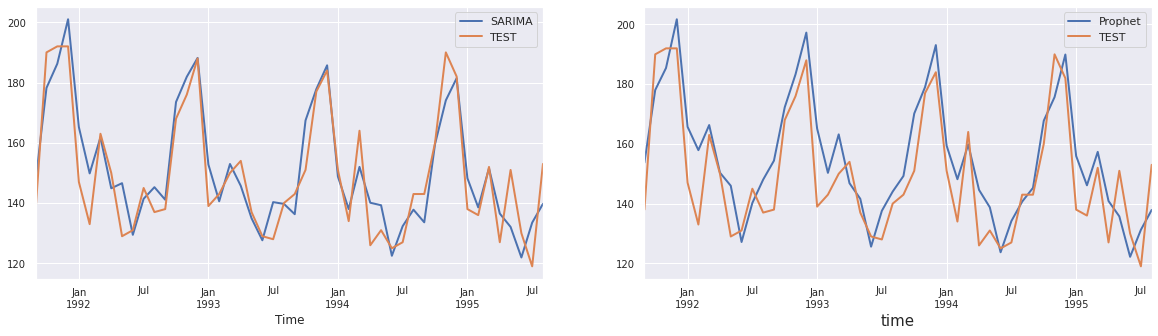

In [289]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
np.exp(RollBack[['SARIMA','TEST']]).plot(figsize=(20,5), linewidth=2, fontsize=10, ax = ax[0])
np.exp(RollBack[['Prophet','TEST']]).plot(figsize=(20,5), linewidth=2, fontsize=10, ax = ax[1])
plt.xlabel('time', fontsize=15);
#plt.show()